# K 近邻算法

## 原理

K近邻算法的本质是将指定对象根据已知特征值分类。

为了提高算法的可靠性，在实施时会取k个近邻点，这k个点中属于哪一类的较多，然后将当前待识别点划分为哪一类。为了方便判断，k值通常取奇数，这和为了能得到明确的投票结果通常将董事会成员安排为奇数的道理是一样的。

## 计算技巧

计算机的“感觉”是通过逻辑计算和数值计算来实现的。所以，在大多数的情况下，我们要对计算机要处理的对象进行数值化处理，将其量化为具体的值，以便后续处理。

### 归一化

当有多个参数时，一般将这些参数构成列表（数组）进行综合判断。本例以(身高，手指数量)作为特征。因此，嫌疑人的特征值为(180, 9)，受害人的特征值为(173, 10)。此时，可以对二人进行以下判断：● 甲身高为175 cm，缺一根手指，甲的特征值为(175, 9)。

● 甲与嫌疑人特征值的距离= (180-175) + (9-9) = 5

● 甲与受害人特征值的距离= (175-173) + (10-9) = 3

此时，甲的特征值与受害人更接近，断定甲为受害人。

● 乙身高为178 cm，十指健全，乙的特征值为(178, 10)。

● 乙与嫌疑人特征值的距离= (180-178) + (10-9) = 3

● 乙与受害人特征值的距离= (178-173) + (10-10) = 5

此时，乙与嫌疑人的特征值更接近，断定乙为嫌疑人。

**当然，我们知道上述结果是错误的。因为身高、手指数量有着不同的量纲（权值），所以在计算与特征值的距离时要充分考虑不同参数之间的权值。通常情况下，由于各个参数的量纲不一致等原因，需要对参数进行处理，让所有参数具有相等的权值。**

一般情况下，对参数进行归一化处理即可。

**做归一化时，通常使用特征值除以所有特征值中的最大值（或者最大值与最小值的差）。**

例如，上例中用身高除以最高身高180（cm），手指数量除以10（10根手指），得到新的特征值，计算方式为：归一化特征=（身高/最高身高180，手指数量/10）

因此，经过归一化以后：

● 嫌疑人的特征值为(180/180, 9/10) = (1, 0.9)

● 受害人的特征值为(173/180, 10/10) = (0.96, 1)

此时，可以根据归一化以后的特征值，对二人进行判断：

● 甲的特征值为(175/180, 9/10)=(0.97, 0.9)

● 甲与嫌疑人特征值的距离= (1-0.97) + (0.9-0.9) = 0.03

● 甲与受害人特征值的距离= (0.97-0.96) + (1-0.9) = 0.11

此时，甲与犯罪嫌疑人的特征值更接近，断定甲为犯罪嫌疑人。

● 乙的特征值为(178/180, 10/10)=(0.99, 1)

● 乙与嫌疑人的特征值距离= (1-0.99) + (1-0.9) = 0.11

● 乙与受害人的特征值距离= (0.99-0.96) + (1-1) = 0.03

此时，乙与受害人的特征值更接近，断定乙为受害人。

### 距离计算

* 曼哈顿距离：所以，为了避免这种正负相抵的情况，我们通常会计算绝对值的和。这种用绝对值之和表示的距离，称为曼哈顿距离。

* 欧式距离： 更普遍的形式是计算平方和的平方根，这种距离就是被广泛使用的欧氏距离。

# 手写数字识别的原理

这节老师讲的很好，有条件建议读原文。

大致总结一下：

## 特征值提取

把图片均分成比如5x5个块，统计每个块里的黑色像素的个数。

## 数字识别-计算距离

数字识别要做的就是比较待识别图像与图像集中的哪个图像最近。这里，最近指的是二者之间的欧氏距离最短。

## 识别

根据计算的距离，待识别的数字“8”图像与数字“8”特征图像的距离更近。所以，将待识别的数字“8”图像识别为数字“8”特征图像所代表的数字“8”。

# 手写算法

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取样本（特征）图像的值
s='image\\'  # 图像所在路径
num=100 # 样本总数
row=240 # 特征图像的行数
col=240 # 特征图像的列数
a=np.zeros((num, row, col)) # 存储所有样本的数值
#print(a.shape)
n=0 # 存储当前图像的编号
for i in range(0,10):
    for j in range(1,11):
      a[n, :, :]=cv2.imread(s+str(i)+'\\'+str(i)+'-'+str(j)+'.bmp',0)
      n=n+1
#提采样本图像的特征
feature=np.zeros((num, round(row/5), round(col/5))) # 用来存储所有样本的特征值
#print(feature.shape)  # 看看特征值的形状是什么样子
#print(row)            # 看看row的值，有多少个特征值（100）

for ni in range(0, num):
    for nr in range(0, row):
      for nc in range(0, col):
          if a[ni, nr, nc]==255:
              feature[ni, int(nr/5), int(nc/5)]+=1
f=feature   # 简化变量名称
#####计算当前待识别图像的特征值
o=cv2.imread('image\\test\\5.bmp',0) # 读取待识别图像
##读取图像值
of=np.zeros((round(row/5), round(col/5))) # 存储待识别图像的特征值
for nr in range(0, row):
    for nc in range(0, col):
      if o[nr, nc]==255:
          of[int(nr/5), int(nc/5)]+=1
###开始计算，识别数字，计算最邻近的若干个数字是多少，判断结果
d=np.zeros(100)
for i in range(0,100):
    d[i]=np.sum((of-f[i, :, :])*(of-f[i, :, :]))
#print(d)
d=d.tolist()
temp=[]
Inf = max(d)
#print(Inf)
k=7
for i in range(k):
    temp.append(d.index(min(d)))
    d[d.index(min(d))]=Inf
#print(temp)   #看看都被识别为哪些特征值
temp=[i/10 for i in temp]
# 也可以返回去处理为array，使用函数处理
#temp=np.array(temp)
#temp=np.trunc(temp/10)
#print(temp)
# 数组r用来存储结果，r[0]表示K近邻中“0”的个数，r[n]表示K近邻中“n”的个数
r=np.zeros(10)
for i in temp:
    r[int(i)]+=1
#print(r)
print('当前的数字可能为：'+str(np.argmax(r)))

# OpenCV K近邻模块的基本使用

当前随机数可以判定为类型： [[1.]]
距离当前点最近的5个邻居是： [[1. 1. 1. 1. 1.]]
5个最近邻居的距离：  [[1682. 2164. 2209. 2273. 2285.]]


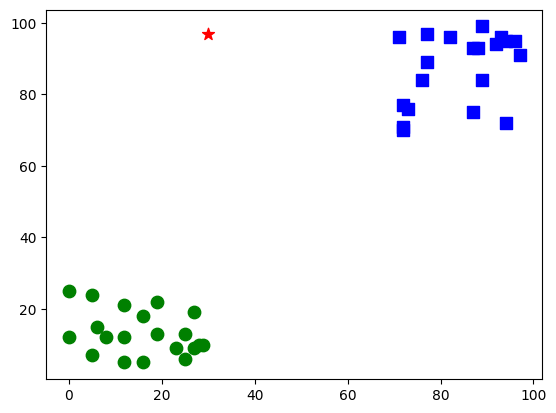

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 用于训练的数据
# rand1数据位于(0,30)
rand1 = np.random.randint(0, 30, (20, 2)).astype(np.float32)
# rand2数据位于(70,100)
rand2 = np.random.randint(70, 100, (20, 2)).astype(np.float32)
# 将rand1和rand2拼接为训练数据
trainData = np.vstack((rand1, rand2))
# 数据标签，共两类：0和1
# r1Label对应着rand1的标签，为类型0
r1Label=np.zeros((20,1)).astype(np.float32)
# r2Label对应着rand2的标签，为类型1
r2Label=np.ones((20,1)).astype(np.float32)
tdLable = np.vstack((r1Label, r2Label))
# 使用绿色标注类型0
g = trainData[tdLable.ravel() == 0]
plt.scatter(g[:,0], g[:,1], 80, 'g', 'o')
# 使用蓝色标注类型1
b = trainData[tdLable.ravel() == 1]
plt.scatter(b[:,0], b[:,1], 80, 'b', 's')
# plt.show()
# test为用于测试的随机数，该数在0到100之间
test = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(test[:,0], test[:,1], 80, 'r', '*')
# 调用OpenCV内的K近邻模块，并进行训练
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, tdLable)
# 使用K近邻算法分类
ret, results, neighbours, dist = knn.findNearest(test, 5)
# 显示处理结果
print("当前随机数可以判定为类型：", results)
print("距离当前点最近的5个邻居是：", neighbours)
print("5个最近邻居的距离： ", dist)
# 可以观察一下显示，对比上述输出
plt.show()